# **Clasificación de dígitos con Redes Neuronales**



La base de datos MNIST es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para la capacitación de varios sistemas de procesamiento de imágenes y las pruebas en el campo del aprendizaje automático.

![MNIST](https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)



Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total). Se utiliza una división estándar del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imágenes para formar un modelo y un conjunto separado de 10.000 imágenes para probarlo.



**Carga de datos**

La variable X contiene las matrices de los pixeles de los dígitos, mientras que la variable y contiene las etiquetas correspondientes a cada dígito

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
len(X_train)

60000

In [3]:
len(X_test)

10000

In [4]:
X_test[0].shape

(28, 28)

Vamos a visualizar la primera imagen del conjunto de entrenamiento


Digit class: 5


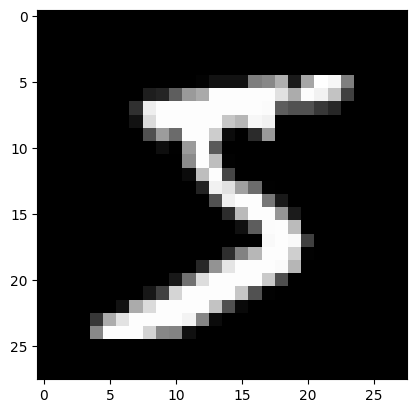

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], 'gray')
print("Digit class:", y_train[0])

Utiliza esta celda para dibujar algún otro dígito del conjunto de entrenamiento junto con su etiqueta


Digit class: 2


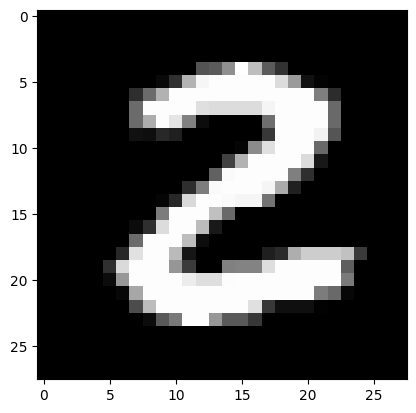

In [7]:
# Introduce tu código
plt.imshow(X_train[25], 'gray')
print("Digit class:", y_train[25])

Antes de construir modelos de redes neuronales vamos a normalizar los datos. Al ser una imagen en escala de grises, basta por dividir entre 255 para que todos los valores estén comprendidos en el intervalo [0,1]

In [8]:
X_train = X_train.astype('float32')/255

Realiza la misma operación con el conjunto de test

In [9]:
# Introduce tu código
X_test = X_test.astype('float32')/255

Para la variable de salida, tenemos que codificarla con el método 'one hot encoding'

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify

In [12]:
y_train, Y_train

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

Realiza la misma operación con el conjunto de test

In [13]:
# Introduce tu código
Y_test = np_utils.to_categorical(y_test, 10) # We have 10 classes to codify

## 1. Red neuronal de una capa
Utilizamos una red secuencial, en la que cada capa es seguida de otra en formato de cadena

In [24]:
from keras.models import Sequential
model = Sequential()

Creamos la capa, especificando el número de entradas y salidas de la red

In [25]:
from keras.layers.core import Dense
denselayer = Dense(10, input_shape=(784,))

Añadimos la capa a la red

In [26]:
model.add(denselayer)

Añadimos la función de activación softmax a la salida

In [27]:
from keras.layers.core import Activation
model.add(Activation('softmax'))

La definición de la red está completa. Podemos ver una descripción de la misma con el siguiente comando

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Tras definir la arquitectura el siguiente paso es compilar la red. Para este paso, hay que especificar la función de error (usaremos 'categorical crossentropy'), el método de optimización (usaremos 'stochastic gradient descent'), y la métrica de desempeño que queremos observar al finalizar

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

A continuación vamos a entrenar la red. Para ello, debemos transformar las matrices de píxeles en vectores, para que puedan utilizarse como entrada en la red neuronal

In [30]:
trainvectors = X_train.reshape(60000, 784)

Comprobamos que nuestro conjunto de entrenamiento tiene 784 columnas (características) y 60000 filas

In [31]:
trainvectors.shape

(60000, 784)

Realiza la misma operación en el conjunto de test


In [32]:
# Inserta tu código
testvectors = X_test.reshape(10000, 784)

Entrenamos la red con el comando **fit**


In [33]:
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)

Epoch 1/20
469/469 - 1s - loss: 1.2844 - accuracy: 0.6994 - 1s/epoch - 3ms/step
Epoch 2/20
469/469 - 1s - loss: 0.7174 - accuracy: 0.8379 - 909ms/epoch - 2ms/step
Epoch 3/20
469/469 - 1s - loss: 0.5879 - accuracy: 0.8578 - 1s/epoch - 3ms/step
Epoch 4/20
469/469 - 1s - loss: 0.5260 - accuracy: 0.8677 - 1s/epoch - 3ms/step
Epoch 5/20
469/469 - 1s - loss: 0.4884 - accuracy: 0.8743 - 983ms/epoch - 2ms/step
Epoch 6/20
469/469 - 1s - loss: 0.4625 - accuracy: 0.8794 - 850ms/epoch - 2ms/step
Epoch 7/20
469/469 - 1s - loss: 0.4433 - accuracy: 0.8828 - 860ms/epoch - 2ms/step
Epoch 8/20
469/469 - 1s - loss: 0.4284 - accuracy: 0.8858 - 858ms/epoch - 2ms/step
Epoch 9/20
469/469 - 1s - loss: 0.4162 - accuracy: 0.8881 - 872ms/epoch - 2ms/step
Epoch 10/20
469/469 - 1s - loss: 0.4063 - accuracy: 0.8906 - 868ms/epoch - 2ms/step
Epoch 11/20
469/469 - 1s - loss: 0.3977 - accuracy: 0.8924 - 852ms/epoch - 2ms/step
Epoch 12/20
469/469 - 1s - loss: 0.3904 - accuracy: 0.8937 - 874ms/epoch - 2ms/step
Epoch 13/2

Una vez entrenada, obtenemos las predicciones para el conjunto de test

In [34]:
import numpy as np
preds = np.argmax(model.predict(testvectors), axis=-1)
# preds = model.predict_classes(testvectors) [deprecated]

313/313 [==============================] - 1s 1ms/step


Comprobamos, para un ejemplo, si la predicción coincide con la realidad

Real class 2 predicted class 2


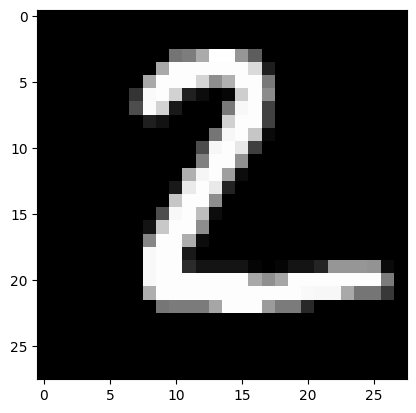

In [36]:
plt.imshow(X_test[1], 'gray')
print("Real class", y_test[1], "predicted class", preds[1])

Veamos ejemplos en los que el modelo ha fallado

Real class 1 predicted class 3


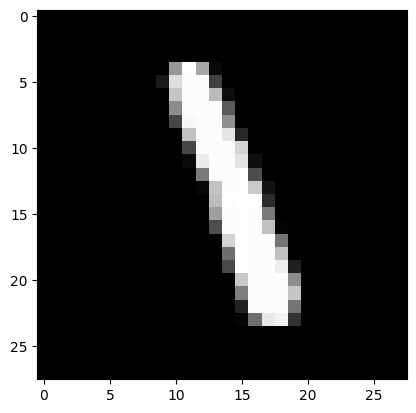

In [40]:
import numpy as np
(fails,) = np.where(y_test != preds)
idx = 2
plt.imshow(X_test[fails[idx]], 'gray')
print("Real class", y_test[fails[idx]], "predicted class", preds[fails[idx]])

Medimos la precisión del clasificador

In [37]:
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.9082
Test loss 0.3368217647075653
Test accuracy 0.9082000255584717


## 2. Red Neuronal de varias capas (Multilayer Perceptron)
Añadimos capas a nuestra red neuronal, con función de activación de tipo sigmoide

In [41]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Compilamos y entrenamos la nueva red, evaluando el nuevo desempeño

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
469/469 - 2s - loss: 2.1964 - accuracy: 0.3433 - 2s/epoch - 4ms/step
Epoch 2/20
469/469 - 1s - loss: 1.9549 - accuracy: 0.5597 - 1s/epoch - 3ms/step
Epoch 3/20
469/469 - 1s - loss: 1.7588 - accuracy: 0.6191 - 915ms/epoch - 2ms/step
Epoch 4/20
469/469 - 1s - loss: 1.5889 - accuracy: 0.6568 - 923ms/epoch - 2ms/step
Epoch 5/20
469/469 - 1s - loss: 1.4415 - accuracy: 0.6937 - 1s/epoch - 2ms/step
Epoch 6/20
469/469 - 1s - loss: 1.3143 - accuracy: 0.7273 - 1s/epoch - 3ms/step
Epoch 7/20
469/469 - 1s - loss: 1.2052 - accuracy: 0.7581 - 1s/epoch - 3ms/step
Epoch 8/20
469/469 - 2s - loss: 1.1120 - accuracy: 0.7811 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 1s - loss: 1.0324 - accuracy: 0.7968 - 1s/epoch - 3ms/step
Epoch 10/20
469/469 - 1s - loss: 0.9644 - accuracy: 0.8123 - 1s/epoch - 3ms/step
Epoch 11/20
469/469 - 1s - loss: 0.9060 - accuracy: 0.8219 - 889ms/epoch - 2ms/step
Epoch 12/20
469/469 - 1s - loss: 0.8555 - accuracy: 0.8308 - 898ms/epoch - 2ms/step
Epoch 13/20
469/469 - 1s 

Para mejorar el desempeño de la red, vamos a incrementar el número de neuronas en las capas ocultas, utilizar la función de activación ReLU y modificar el algoritmo de optimización por *adam* (mejora del algoritmo de gradiente descendente)

In [43]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
469/469 - 3s - loss: 0.3746 - accuracy: 0.8983 - 3s/epoch - 6ms/step
Epoch 2/20
469/469 - 2s - loss: 0.1782 - accuracy: 0.9493 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.1301 - accuracy: 0.9628 - 2s/epoch - 3ms/step
Epoch 4/20
469/469 - 2s - loss: 0.1033 - accuracy: 0.9703 - 2s/epoch - 3ms/step
Epoch 5/20
469/469 - 2s - loss: 0.0843 - accuracy: 0.9751 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.0700 - accuracy: 0.9795 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.0593 - accuracy: 0.9827 - 2s/epoch - 3ms/step
Epoch 8/20
469/469 - 2s - loss: 0.0506 - accuracy: 0.9854 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 2s - loss: 0.0437 - accuracy: 0.9875 - 2s/epoch - 5ms/step
Epoch 10/20
469/469 - 2s - loss: 0.0377 - accuracy: 0.9889 - 2s/epoch - 3ms/step
Epoch 11/20
469/469 - 2s - loss: 0.0326 - accuracy: 0.9912 - 2s/epoch - 3ms/step
Epoch 12/20
469/469 - 2s - loss: 0.0284 - accuracy: 0.9923 - 2s/epoch - 3ms/step
Epoch 13/20
469/469 - 2s - loss: 0.02

Define una nueva red con dos capas ocultas, cada una con 512 neuronas y una función de activación ReLU. Para la salida, utiliza la función de activación *softmax*. Utiliza *adam* como algoritmo de optimización y compara el desempeño de esta nueva red con los resultados anteriores

In [46]:
# Introduce tu código
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
469/469 - 8s - loss: 0.2178 - accuracy: 0.9365 - 8s/epoch - 17ms/step
Epoch 2/20
469/469 - 8s - loss: 0.0804 - accuracy: 0.9749 - 8s/epoch - 17ms/step
Epoch 3/20
469/469 - 7s - loss: 0.0500 - accuracy: 0.9838 - 7s/epoch - 15ms/step
Epoch 4/20
469/469 - 8s - loss: 0.0365 - accuracy: 0.9882 - 8s/epoch - 17ms/step
Epoch 5/20
469/469 - 8s - loss: 0.0285 - accuracy: 0.9907 - 8s/epoch - 17ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0221 - accuracy: 0.9927 - 7s/epoch - 14ms/step
Epoch 7/20
469/469 - 8s - loss: 0.0194 - accuracy: 0.9933 - 8s/epoch - 17ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0142 - accuracy: 0.9954 - 7s/epoch - 14ms/step
Epoch 9/20
469/469 - 8s - loss: 0.0179 - accuracy: 0.9944 - 8s/epoch - 17ms/step
Epoch 10/20
469/469 - 8s - loss: 0.0154 - accuracy: 0.9952 - 8s/epoch - 16ms/step
Epoch 11/20
469/469 - 8s - loss: 0.0123 - accuracy: 0.9962 - 8s/epoch - 16ms/step
Epoch 12/20
469/469 - 8s - loss: 0.0100 - accuracy: 0.9968 - 8s/epoch - 17ms/step
Epoch 13/20
469/469 - 7s 

A continuación, vamos a introducir regularización con el método **dropout**. En este ejemplo, creamos una capa dropout, que recibe las salidas de la capa anterior y las asigna a 0 con una probabilidad del 30%


In [47]:
from keras.layers.core import Dropout
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
469/469 - 6s - loss: 0.2936 - accuracy: 0.9158 - 6s/epoch - 12ms/step
Epoch 2/20
469/469 - 6s - loss: 0.1303 - accuracy: 0.9610 - 6s/epoch - 12ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0921 - accuracy: 0.9725 - 5s/epoch - 10ms/step
Epoch 4/20
469/469 - 6s - loss: 0.0715 - accuracy: 0.9782 - 6s/epoch - 12ms/step
Epoch 5/20
469/469 - 6s - loss: 0.0566 - accuracy: 0.9822 - 6s/epoch - 12ms/step
Epoch 6/20
469/469 - 5s - loss: 0.0484 - accuracy: 0.9850 - 5s/epoch - 11ms/step
Epoch 7/20
469/469 - 5s - loss: 0.0392 - accuracy: 0.9878 - 5s/epoch - 11ms/step
Epoch 8/20
469/469 - 5s - loss: 0.0359 - accuracy: 0.9890 - 5s/epoch - 10ms/step
Epoch 9/20
469/469 - 6s - loss: 0.0297 - accuracy: 0.9906 - 6s/epoch - 12ms/step
Epoch 10/20
469/469 - 5s - loss: 0.0268 - accuracy: 0.9913 - 5s/epoch - 10ms/step
Epoch 11/20
469/469 - 5s - loss: 0.0246 - accuracy: 0.9923 - 5s/epoch - 11ms/step
Epoch 12/20
469/469 - 5s - loss: 0.0206 - accuracy: 0.9935 - 5s/epoch - 11ms/step
Epoch 13/20
469/469 - 5s 

## 3. Redes Neuronales Convolucionales
Para mejorar el desempeño del clasificador de imágenes, necesitamos redes que consideren los datos de entrada como imágenes, y tengan en cuenta la relación entre los píxeles. Las redes convolutivas son la mejor manera de hacer esto

Para las redes convolucionales, necesitamos organizar los datos en forma de tensores, con las siguientes dimensiones:
- Índice de la imagen (por ejemplo, la 3ª imagen del dataset)
- Índice de la fila
- Índice de la columna
- Índice del canal RGB

En nuestro caso, tenemos imágenes en blanco y negro de 28 filas x 28 columnas

In [48]:
traintensor = X_train.reshape(60000, 28, 28, 1)
testtensor = X_test.reshape(10000, 28, 28, 1)

Cuando definimos una red convolucional, las capas de convolución y pooling trabajan conjuntamente. La manera más habitual de utilizar estas capas es siguiendo el siguiente patrón:
- Una capa convolucional con función de activación ReLU
- Una capa pooling
- Dropout (si queremos introducir regularización)

Definimos por tanto nuestra red:

In [49]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D

img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate
                        (kernel_size, kernel_size), # Size of convolution kernels
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.25))

Tras las capas convolucionales+pooling, tenemos que transformar el tensor a un vector, de manera que la salida final de la red sea el número de clases (en nuestro caso 10). Para ello creamos una capa de tipo **Flatten**, seguida de una capa de tipo **Dense**

In [50]:
from keras.layers.core import Flatten
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

A continuación, compilamos y entrenamos nuestra red convolucional

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
469/469 - 27s - loss: 0.3637 - accuracy: 0.9028 - 27s/epoch - 59ms/step
Epoch 2/20
469/469 - 28s - loss: 0.1404 - accuracy: 0.9608 - 28s/epoch - 60ms/step
Epoch 3/20
469/469 - 30s - loss: 0.1010 - accuracy: 0.9714 - 30s/epoch - 65ms/step
Epoch 4/20
469/469 - 33s - loss: 0.0842 - accuracy: 0.9758 - 33s/epoch - 69ms/step
Epoch 5/20
469/469 - 28s - loss: 0.0744 - accuracy: 0.9778 - 28s/epoch - 61ms/step
Epoch 6/20
469/469 - 32s - loss: 0.0670 - accuracy: 0.9797 - 32s/epoch - 68ms/step
Epoch 7/20
469/469 - 31s - loss: 0.0610 - accuracy: 0.9818 - 31s/epoch - 65ms/step
Epoch 8/20
469/469 - 27s - loss: 0.0568 - accuracy: 0.9827 - 27s/epoch - 58ms/step
Epoch 9/20
469/469 - 28s - loss: 0.0524 - accuracy: 0.9846 - 28s/epoch - 60ms/step
Epoch 10/20
469/469 - 27s - loss: 0.0498 - accuracy: 0.9849 - 27s/epoch - 58ms/step
Epoch 11/20
469/469 - 26s - loss: 0.0473 - accuracy: 0.9854 - 26s/epoch - 56ms/step
Epoch 12/20
469/469 - 28s - loss: 0.0441 - accuracy: 0.9865 - 28s/epoch - 60ms/step
E

Construye y entrena una CNN con las siguientes capas:
- Dos capas convolucionales con 32 kernels de tamaño 3x3 y función ReLU
- Una Capa MaxPooling de tamaño 2
- Un 25% de DropOout
- Una capa de tipo Flatten
- Una capa densa con 128 neuronas y función ReLU
- Un 50% de dropout
- Una capa de salida densa con función de activación softmax

¿Hay mejora en el desempeño?

In [ ]:
# Introduce tu código

img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate
                        (kernel_size, kernel_size), # Size of convolution kernels
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))

model.add(Convolution2D(32, # Number convolution channels to generate
                        (kernel_size, kernel_size), # Size of convolution kernels
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Por último, probamos la arquitectura **[LeNet](http://yann.lecun.com/exdb/lenet/)**, cuya efectividad ha sido demostrada en este caso particular. Las capas que utiliza son las siguientes:
- Capa convolucional con 20 kernels de tamaño 5 y función ReLU
- MaxPooling de tamaño 2 y stride 2
- 25% Dropout
- Capa convolucional con 50 kernels de tamaño 5 y función ReLU
- MaxPooling de tamaño 2 y stride 2
- 25% Dropout
- Capa Flatten
- Capa Densa con 500 neuronas y función ReLU
- 50% Dropout
- Capa Densa con función softmax


In [ ]:
img_rows = 28
img_cols = 28

model = Sequential()

model.add(Convolution2D(20, (5, 5),
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(50, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=1 # Level of verbosity of the log messages
)
score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Epoch 1/20
469/469 [==============================] - 63s 132ms/step - loss: 0.2700 - accuracy: 0.9163
Epoch 2/20
469/469 [==============================] - 61s 130ms/step - loss: 0.0733 - accuracy: 0.9774
Epoch 3/20
469/469 [==============================] - 59s 127ms/step - loss: 0.0549 - accuracy: 0.9836
Epoch 4/20
469/469 [==============================] - 61s 130ms/step - loss: 0.0438 - accuracy: 0.9867
Epoch 5/20
469/469 [==============================] - 60s 128ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 6/20
 14/469 [..............................] - ETA: 1:24 - loss: 0.0370 - accuracy: 0.9894